<a href="https://colab.research.google.com/github/krsmith/DS-Sprint-01-Dealing-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fake = pd.Series([38,3,2,3,4,2,3,1,4,33], index=range(1,11))

In [0]:
plt.style.use('fivethirtyeight')

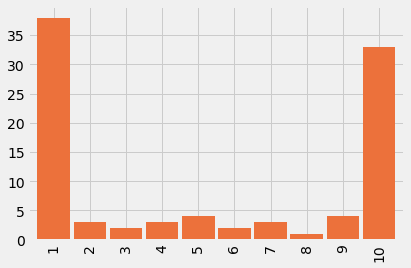

In [4]:
fake.plot.bar(color='#EC713B', width=.9);

## We can make the same chart as a histogram with the actual ratings.

In [0]:
fake2 = pd.Series([
    1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    2,2,2,2,2,
    3,3,
    4,4,4,4,
    5,
    6,6,
    7,7,7,7,
    8,8,8,
    9,9,9,9,
    10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10])

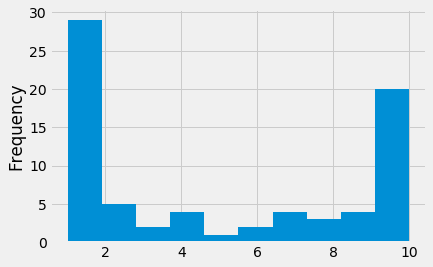

In [6]:
fake2.plot.hist();

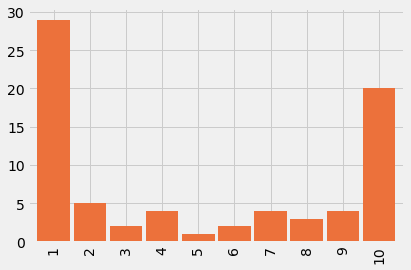

In [7]:
fake2.value_counts().sort_index().plot.bar(color='#EC713B', width=.9);

Text(-2,42,'IMDb ratings for film as of Aug. 29')

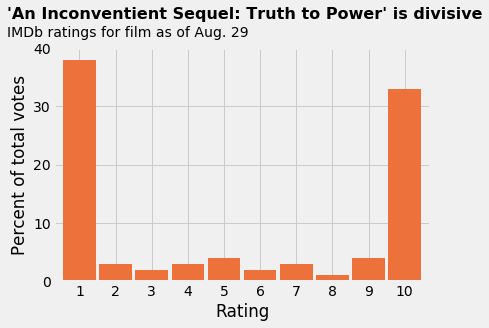

In [8]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38,3,2,3,4,2,3,1,4,33], index=range(1,11))

ax = fake.plot.bar(color='#EC713B', width=.9);

ax.tick_params(labelrotation=0) # Rotates axis labels to no longer be 90 degrees
ax.set(xlabel='Rating',
       ylabel='Percent of total votes',
       yticks=range(0,45,10))
ax.text(x=-2, y=45, s="'An Inconventient Sequel: Truth to Power' is divisive",
        fontsize=16,fontweight='bold')
ax.text(x=-2, y=42, s="IMDb ratings for film as of Aug. 29")

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [10]:
df.shape

(80053, 27)

In [11]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
pd.options.display.max_columns = None

In [13]:
df.sample().T

,24076
timestamp,2017-08-09 11:50:05.470957
respondents,715
category,US users
link,http://www.imdb.com/title/tt6322922/ratings-usa
average,4.3
mean,4.8
median,2
1_votes,345
2_votes,27
3_votes,13


In [0]:
df.timestamp= pd.to_datetime(df.timestamp)

In [15]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index('timestamp', inplace=True)

In [17]:
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [18]:
df.category.value_counts()

Aged 45+              4216
Females Aged 18-29    4216
Females Aged 45+      4216
Males                 4216
Females               4216
Females Aged 30-44    4216
Aged 18-29            4216
Males Aged 18-29      4216
Males Aged 45+        4216
US users              4216
Non-US users          4216
Males under 18        4216
Top 1000 voters       4216
Aged under 18         4216
Aged 30-44            4216
Males Aged 30-44      4216
IMDb staff            4216
IMDb users            4216
Females under 18      4165
Name: category, dtype: int64

In [19]:
df.link.value_counts()

http://www.imdb.com/title/tt6322922/ratings                  4216
http://www.imdb.com/title/tt6322922/ratings-female_age_3     4216
http://www.imdb.com/title/tt6322922/ratings-male_age_3       4216
http://www.imdb.com/title/tt6322922/ratings-age_1            4216
http://www.imdb.com/title/tt6322922/ratings-female_age_4     4216
http://www.imdb.com/title/tt6322922/ratings-top_1000         4216
http://www.imdb.com/title/tt6322922/ratings-male             4216
http://www.imdb.com/title/tt6322922/ratings-international    4216
http://www.imdb.com/title/tt6322922/ratings-male_age_4       4216
http://www.imdb.com/title/tt6322922/ratings-male_age_2       4216
http://www.imdb.com/title/tt6322922/ratings-male_age_1       4216
http://www.imdb.com/title/tt6322922/ratings-age_3            4216
http://www.imdb.com/title/tt6322922/ratings-usa              4216
http://www.imdb.com/title/tt6322922/ratings-age_2            4216
http://www.imdb.com/title/tt6322922/ratings-imdb_staff       4216
http://www

In [20]:
df[df.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


In [0]:
lastday = df['2017-08-29']

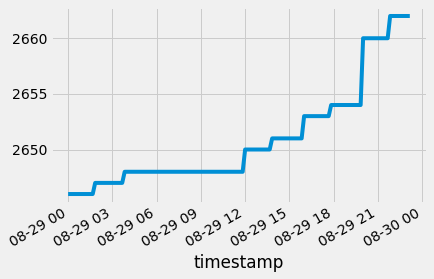

In [22]:
lastday[lastday.category=='IMDb users'].respondents.plot();

In [0]:
final = df.tail(1)

In [24]:
columns = ['1_pct', '2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct']
final[columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
data = final[columns].T

In [26]:
data.index = range(1,11)
data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


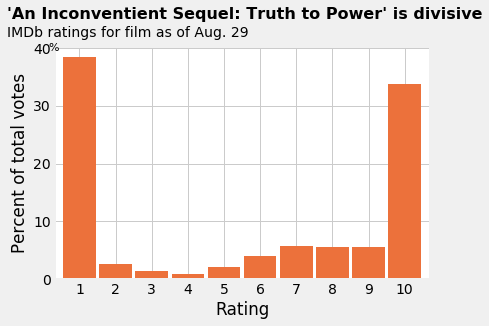

In [27]:
plt.style.use('fivethirtyeight')

ax = data.plot.bar(color='#EC713B', width=.9, legend=False);

ax.tick_params(labelrotation=0) # Rotates axis labels to no longer be 90 degrees
ax.set(xlabel='Rating',
       ylabel='Percent of total votes',
       yticks=range(0,45,10)) # Changes y values, (min, max(non-inclusive),jump)
ax.text(x=-2, y=45, s="'An Inconventient Sequel: Truth to Power' is divisive",
        fontsize=16,fontweight='bold')
ax.text(x=-2, y=42, s="IMDb ratings for film as of Aug. 29")
ax.text(x=-.85, y=39.5, s="%",fontsize=11)
ax.set_facecolor('white')

In [28]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

In [47]:
df_mf = df[(df.category=='Females') | (df.category=='Males')]

df_mf.head(10)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:34:17.770310,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:34:17.963319,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 13:00:02.497484,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 13:00:02.744275,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 14:00:02.990387,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5
2017-07-17 14:00:03.286461,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 15:00:02.218990,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5


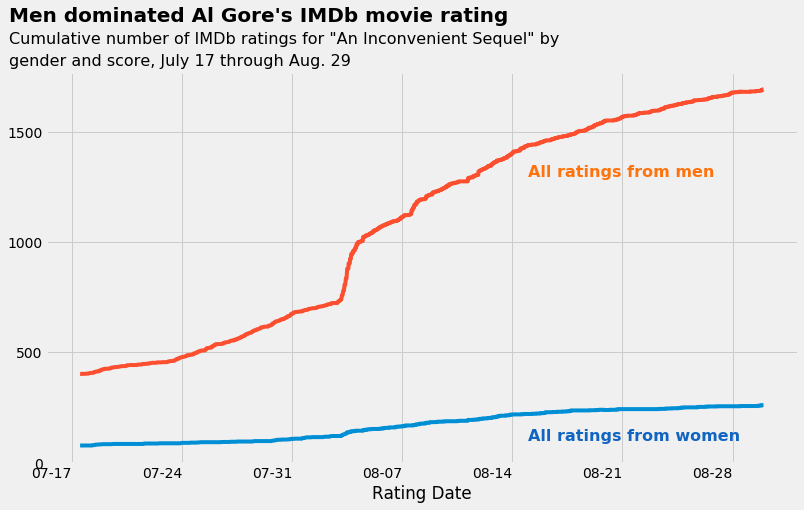

In [176]:
import matplotlib.dates as md
import datetime
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(12,8))
xfmt = md.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(xfmt)

df[df.category=='Females'].respondents.plot()
df[df.category=='Males'].respondents.plot()
#df[df.category=='IMDb users'].df['1_votes'].plot()

ax.set(xlabel='Rating Date', yticks=range(0,1600,500))
ax.tick_params(labelrotation=0)

ax.text(datetime.date(2017,8,15),1300,s="All ratings from men", color='#ff720c',
        fontweight='bold', fontsize=16)

ax.text(datetime.date(2017,8,15),100,s="All ratings from women", color='#0f65c1',
        fontweight='bold', fontsize=16)

ax.text(datetime.date(2017,7,13),2000,s="Men dominated Al Gore's IMDb movie rating",
        fontweight='bold', fontsize=20);

ax.text(datetime.date(2017,7,13),1900,
        s='Cumulative number of IMDb ratings for "An Inconvenient Sequel" by'
        , fontsize=16);
ax.text(datetime.date(2017,7,13),1800,
        s='gender and score, July 17 through Aug. 29'
        , fontsize=16);
